In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
credit_cc=pd.read_csv('D:\Python\Dataset\Credit_Card_Data.csv')

In [3]:
#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
credit_cc

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Bad_Flag
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1,0
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1,0
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2,0
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1,1


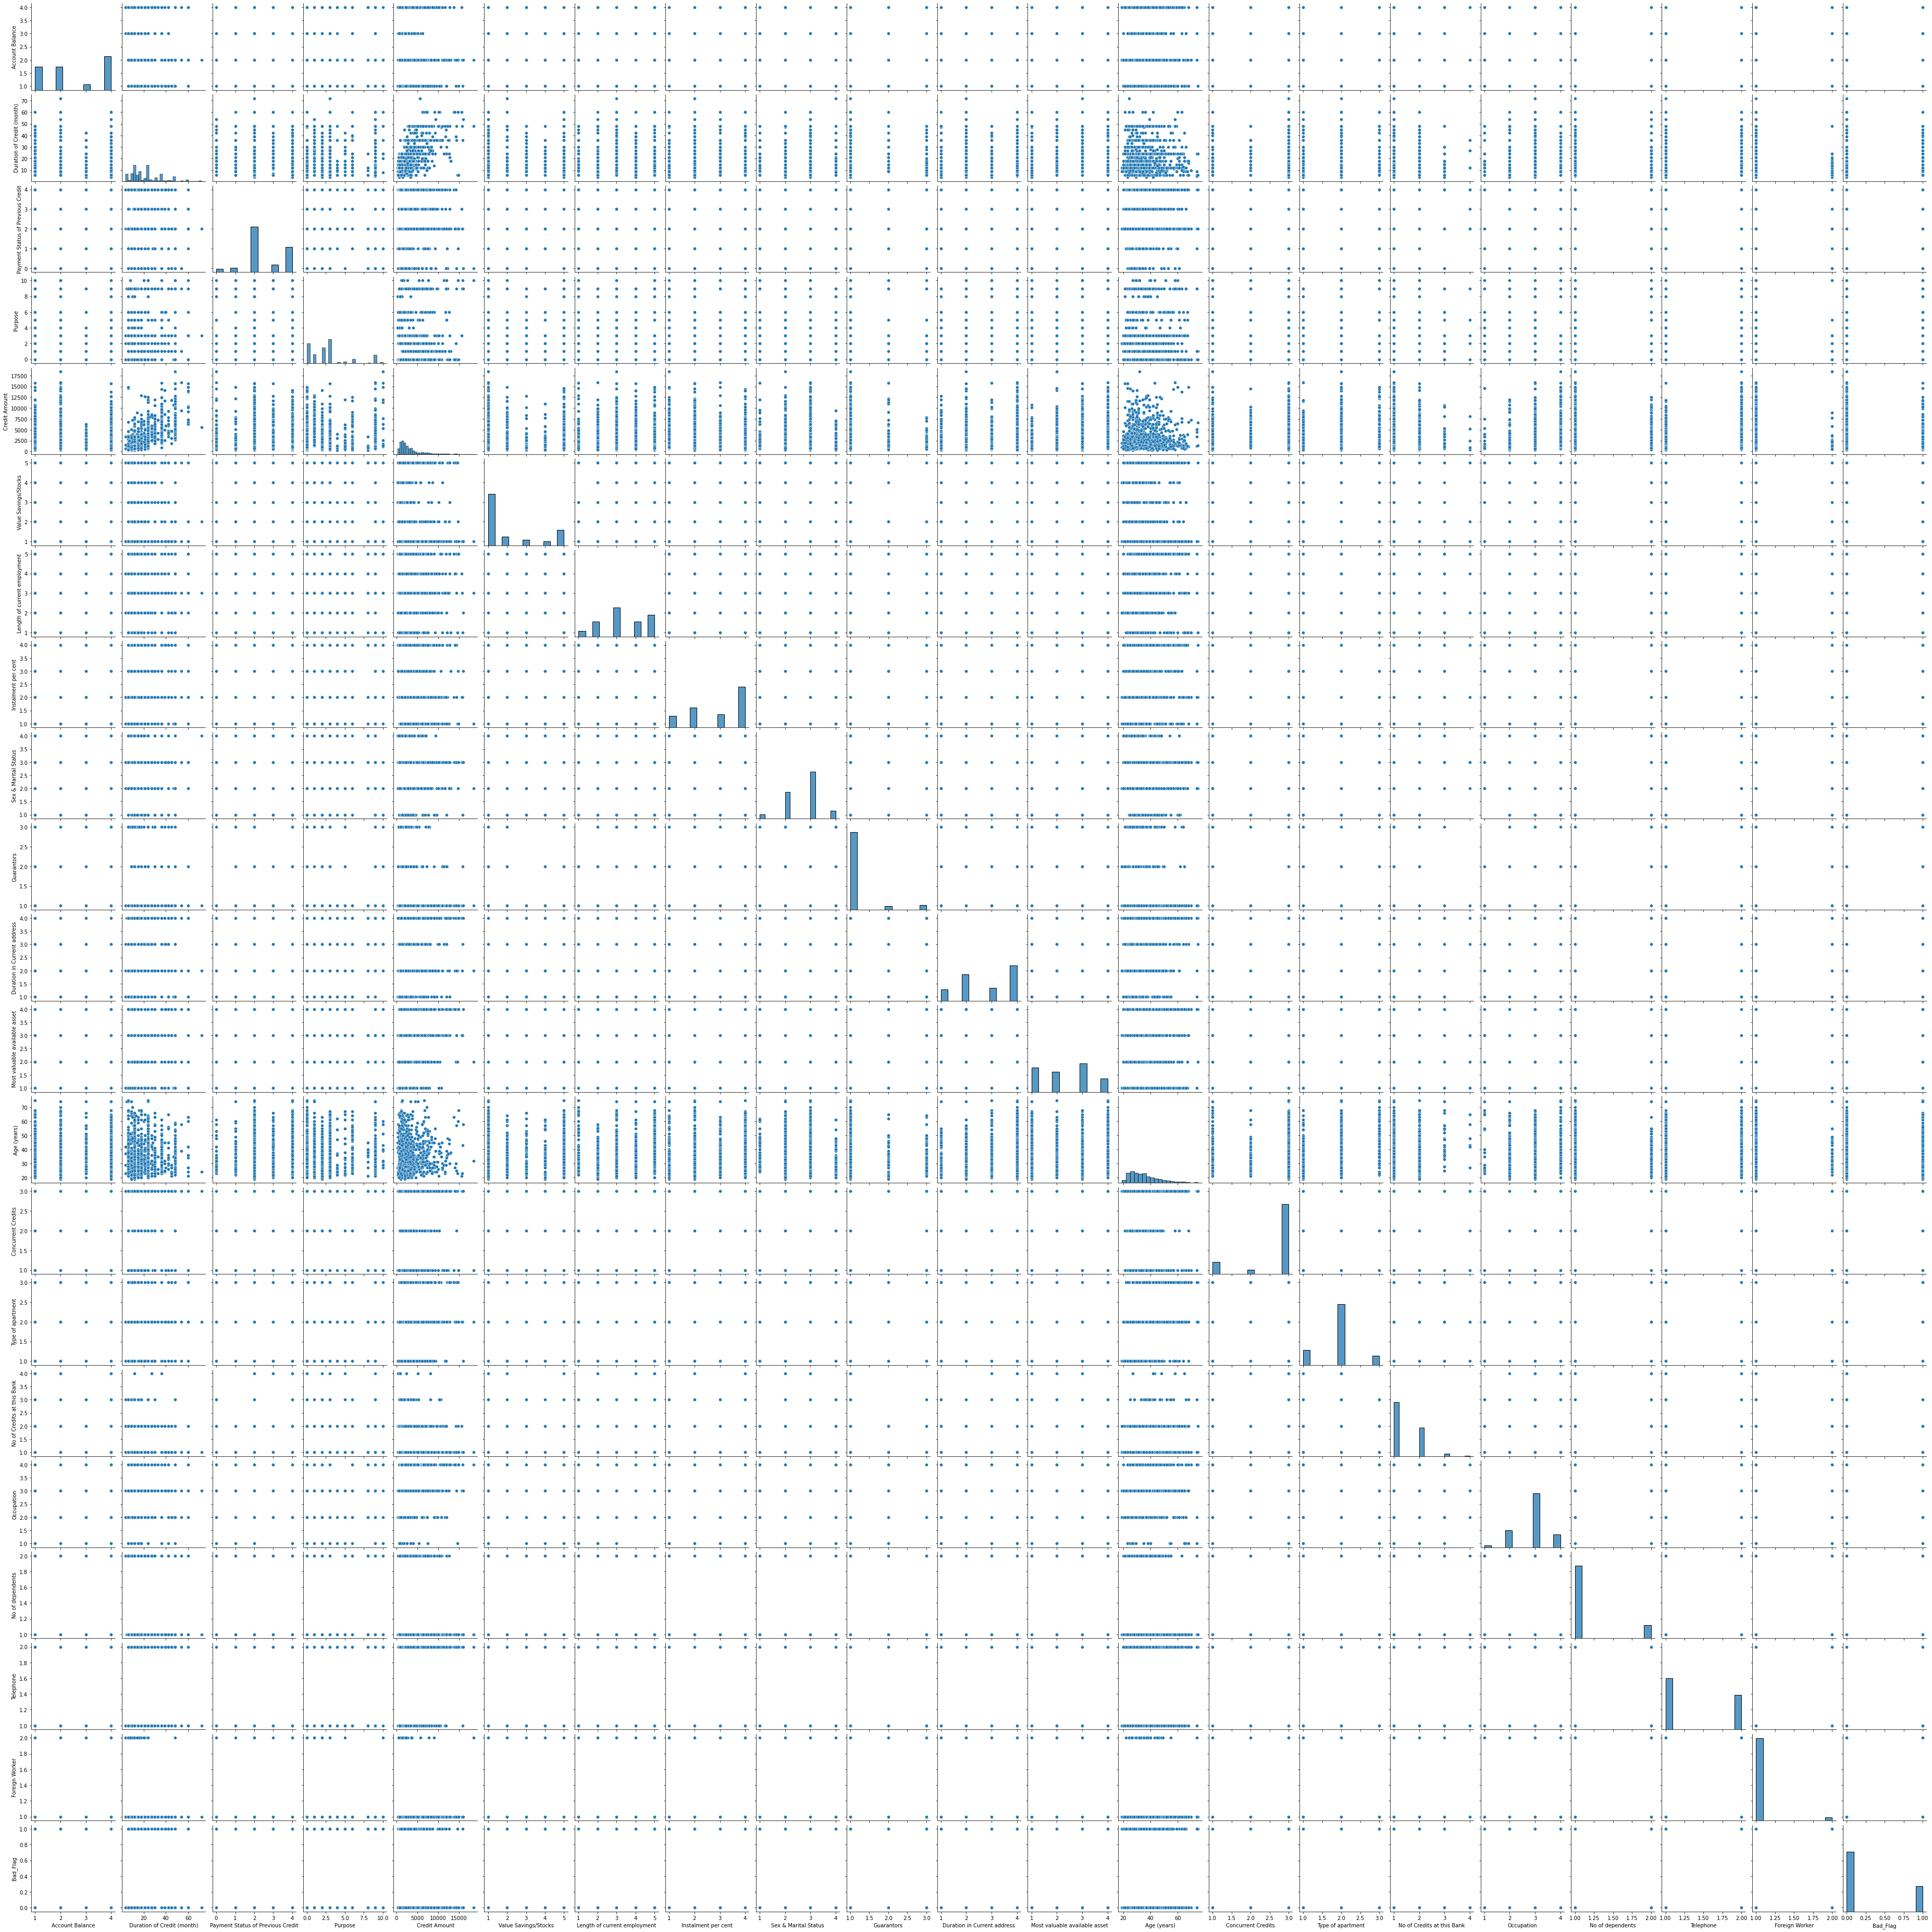

In [4]:
sns.pairplot(credit_cc)

In [5]:
credit_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Account Balance                    1000 non-null   int64
 1   Duration of Credit (month)         1000 non-null   int64
 2   Payment Status of Previous Credit  1000 non-null   int64
 3   Purpose                            1000 non-null   int64
 4   Credit Amount                      1000 non-null   int64
 5   Value Savings/Stocks               1000 non-null   int64
 6   Length of current employment       1000 non-null   int64
 7   Instalment per cent                1000 non-null   int64
 8   Sex & Marital Status               1000 non-null   int64
 9   Guarantors                         1000 non-null   int64
 10  Duration in Current address        1000 non-null   int64
 11  Most valuable available asset      1000 non-null   int64
 12  Age (years)          

In [6]:
credit_cc.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Balance,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
Purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Value Savings/Stocks,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Sex & Marital Status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
Guarantors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


### Data cleaning

In [7]:
credit_cc.rename(columns={'Account Balance':'Account_Balance','Duration of Credit (month)':'Duration_of_Credit',})

,Account_Balance,Duration_of_Credit,Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Bad_Flag
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1,0
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1,0
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2,0
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1,1


In [8]:
credit_cc.columns=credit_cc.columns.str.replace(' ','_')

In [9]:
credit_cc.columns

Index(['Account_Balance', 'Duration_of_Credit_(month)', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount', 'Value_Savings/Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_&_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Age_(years)', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker', 'Bad_Flag'], dtype='object')

In [10]:
credit_cc.rename(columns={'Duration of Credit (month)':'Duration_of_Credit','Sex_&_Marital_Status':'Marital_Status',
                          'Value_Savings/Stocks':'Savings_Stocks','Age_(years)':'Age'},inplace=True)

In [11]:
credit_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Account_Balance                    1000 non-null   int64
 1   Duration_of_Credit_(month)         1000 non-null   int64
 2   Payment_Status_of_Previous_Credit  1000 non-null   int64
 3   Purpose                            1000 non-null   int64
 4   Credit_Amount                      1000 non-null   int64
 5   Savings_Stocks                     1000 non-null   int64
 6   Length_of_current_employment       1000 non-null   int64
 7   Instalment_per_cent                1000 non-null   int64
 8   Marital_Status                     1000 non-null   int64
 9   Guarantors                         1000 non-null   int64
 10  Duration_in_Current_address        1000 non-null   int64
 11  Most_valuable_available_asset      1000 non-null   int64
 12  Age                  

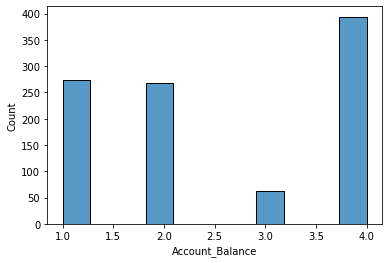

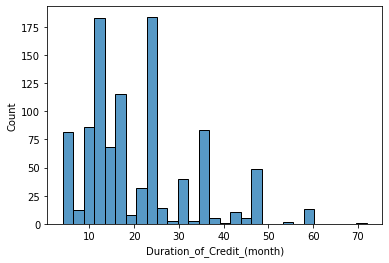

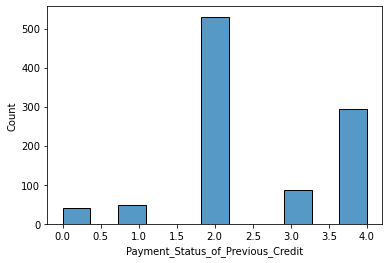

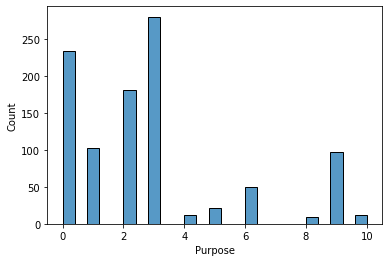

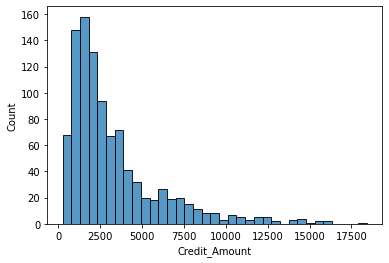

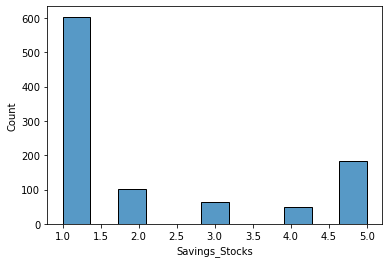

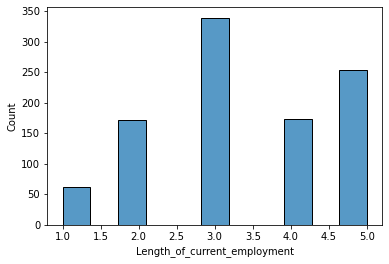

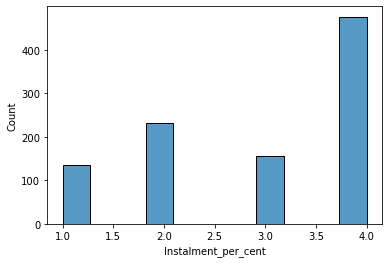

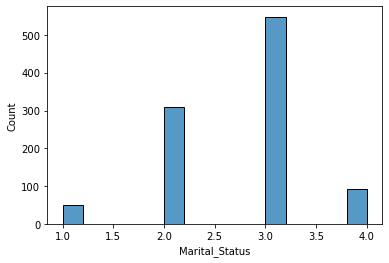

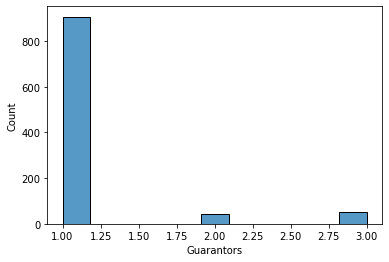

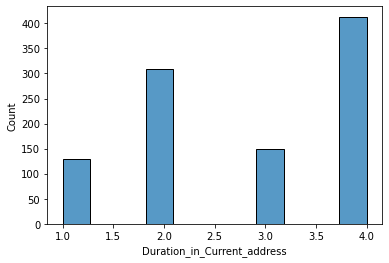

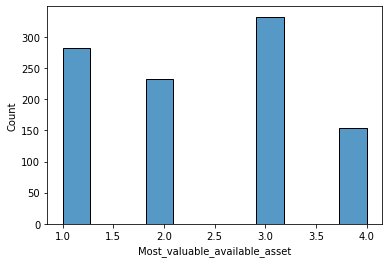

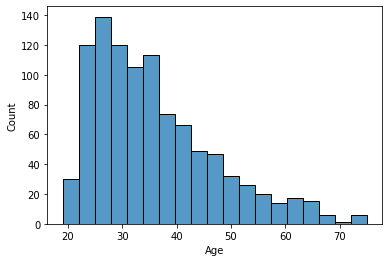

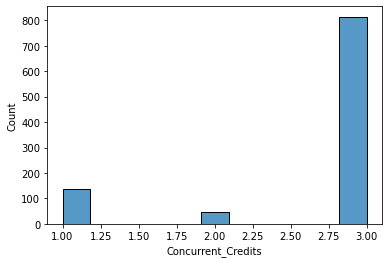

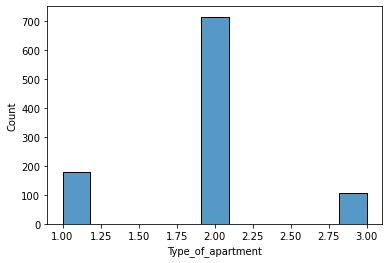

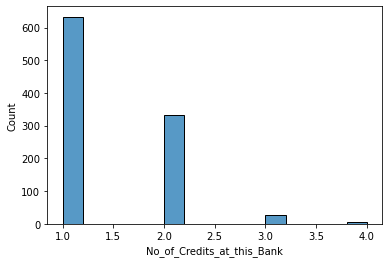

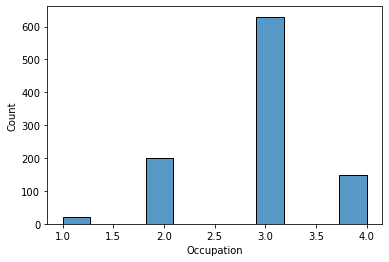

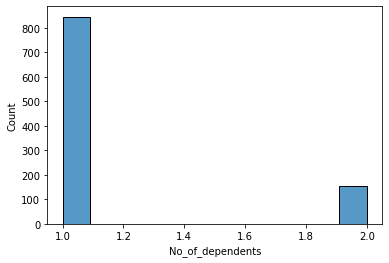

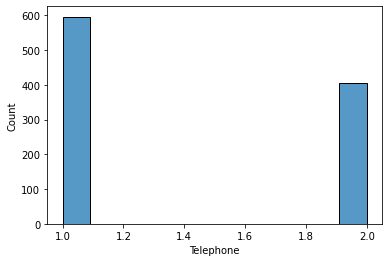

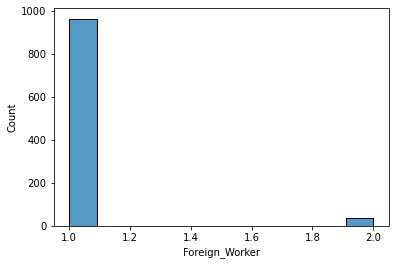

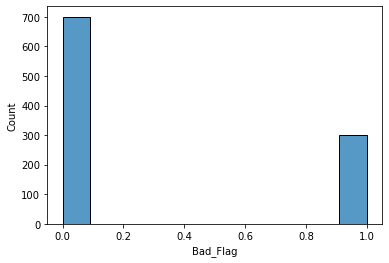

In [12]:
#### Univarairate Analysis

for i in credit_cc.columns:
    sns.histplot(credit_cc[i])
    plt.show()

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


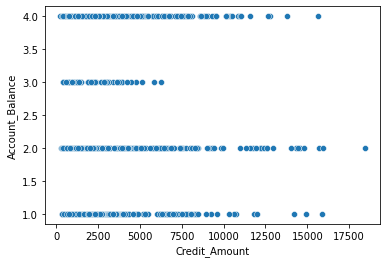

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


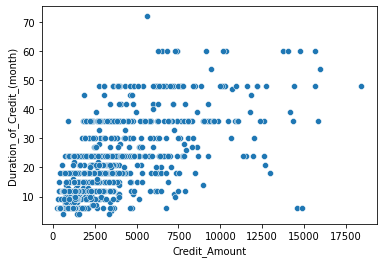

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


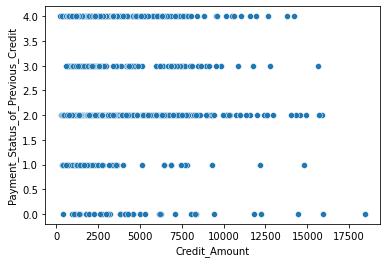

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


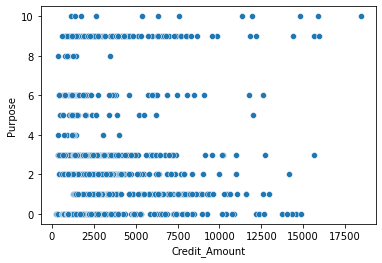

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


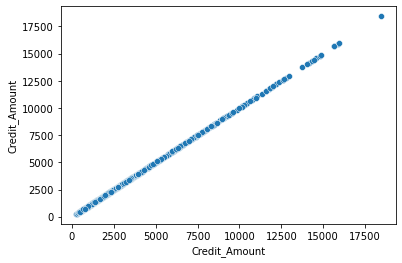

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


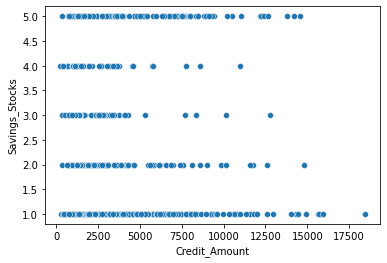

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


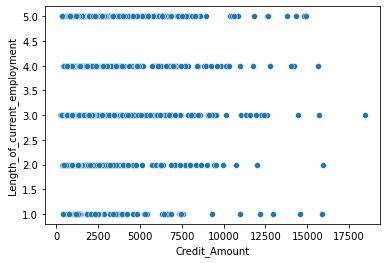

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


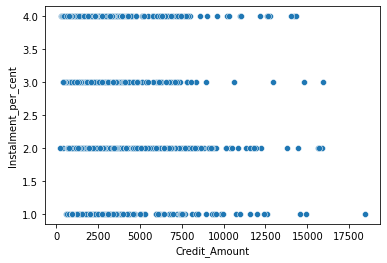

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


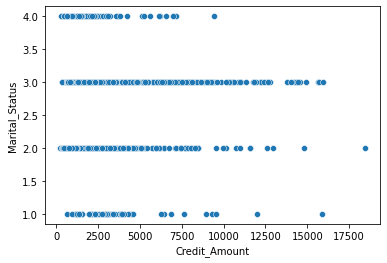

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


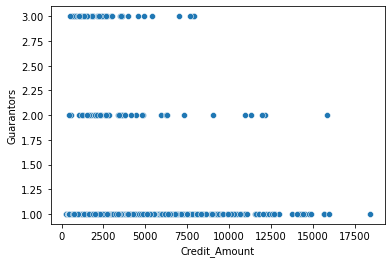

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


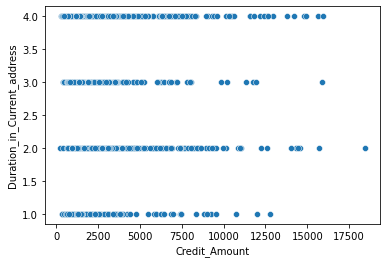

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


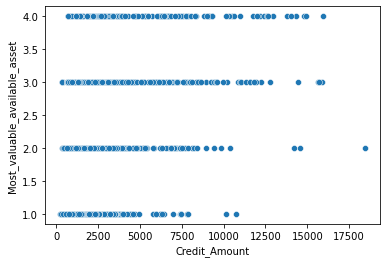

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


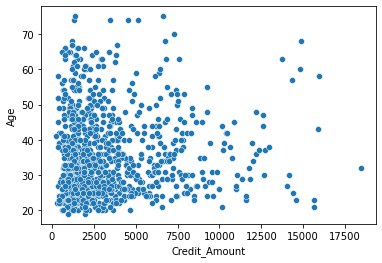

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


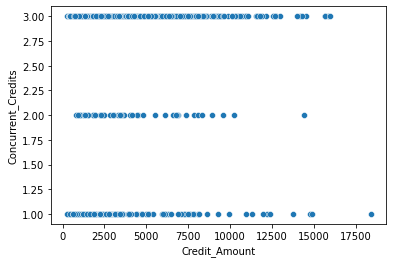

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


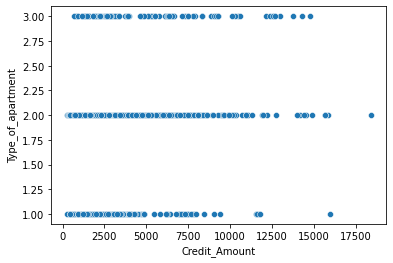

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


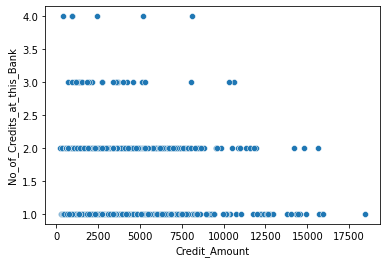

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


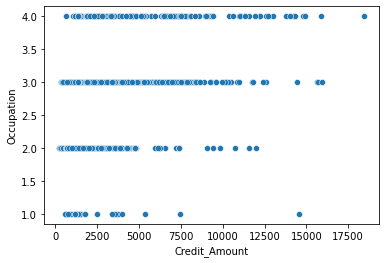

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


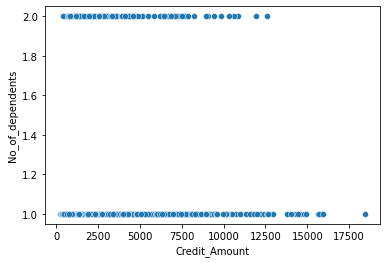

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


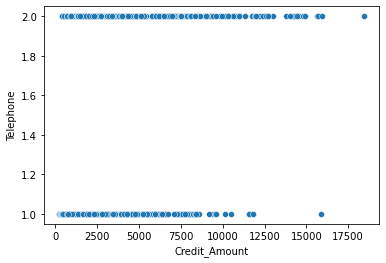

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


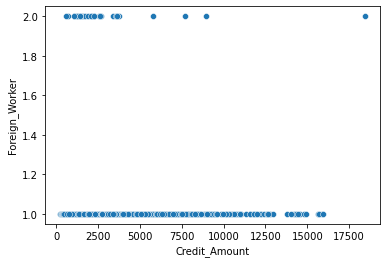

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


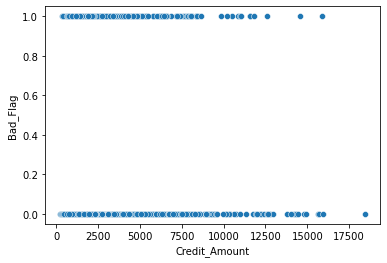

In [13]:
#### Bivariate analysis to check the relationship with the credit amiunt variable

for i in credit_cc.columns:
    sns.scatterplot(credit_cc['Credit_Amount'],y=credit_cc[i],data=credit_cc)
    plt.show()

In [14]:
credit_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Account_Balance                    1000 non-null   int64
 1   Duration_of_Credit_(month)         1000 non-null   int64
 2   Payment_Status_of_Previous_Credit  1000 non-null   int64
 3   Purpose                            1000 non-null   int64
 4   Credit_Amount                      1000 non-null   int64
 5   Savings_Stocks                     1000 non-null   int64
 6   Length_of_current_employment       1000 non-null   int64
 7   Instalment_per_cent                1000 non-null   int64
 8   Marital_Status                     1000 non-null   int64
 9   Guarantors                         1000 non-null   int64
 10  Duration_in_Current_address        1000 non-null   int64
 11  Most_valuable_available_asset      1000 non-null   int64
 12  Age                  

In [15]:
credit_cc.columns=credit_cc.columns.str.lower()

In [16]:
credit_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   account_balance                    1000 non-null   int64
 1   duration_of_credit_(month)         1000 non-null   int64
 2   payment_status_of_previous_credit  1000 non-null   int64
 3   purpose                            1000 non-null   int64
 4   credit_amount                      1000 non-null   int64
 5   savings_stocks                     1000 non-null   int64
 6   length_of_current_employment       1000 non-null   int64
 7   instalment_per_cent                1000 non-null   int64
 8   marital_status                     1000 non-null   int64
 9   guarantors                         1000 non-null   int64
 10  duration_in_current_address        1000 non-null   int64
 11  most_valuable_available_asset      1000 non-null   int64
 12  age                  

In [17]:
credit_cc.rename(columns={'duration_of_credit_(month)':'duration_of_credit'},inplace=True)

In [18]:
credit_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   account_balance                    1000 non-null   int64
 1   duration_of_credit                 1000 non-null   int64
 2   payment_status_of_previous_credit  1000 non-null   int64
 3   purpose                            1000 non-null   int64
 4   credit_amount                      1000 non-null   int64
 5   savings_stocks                     1000 non-null   int64
 6   length_of_current_employment       1000 non-null   int64
 7   instalment_per_cent                1000 non-null   int64
 8   marital_status                     1000 non-null   int64
 9   guarantors                         1000 non-null   int64
 10  duration_in_current_address        1000 non-null   int64
 11  most_valuable_available_asset      1000 non-null   int64
 12  age                  

In [19]:
### conversion of the variables to object type
cat_data=credit_cc[credit_cc.columns.difference(['duration_of_credit','age','credit_amount'])]

In [20]:
cont_data=credit_cc[['duration_of_credit','age']]

In [21]:
x=pd.concat([cat_data,cont_data],axis=1)

In [22]:
y=credit_cc['credit_amount']

In [23]:
## train test split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)

In [24]:
### Encoding of the variables ,nominal variables
nom_data_train=train_x[['account_balance','payment_status_of_previous_credit','purpose','savings_stocks','marital_status','telephone','bad_flag','concurrent_credits','foreign_worker']]
ord_data_train=train_x[['length_of_current_employment','guarantors','duration_in_current_address','most_valuable_available_asset','type_of_apartment','no_of_credits_at_this_bank','occupation','instalment_per_cent','no_of_dependents']]

In [25]:
nom_data_test=test_x[['account_balance','payment_status_of_previous_credit','purpose','savings_stocks','marital_status','telephone','bad_flag','concurrent_credits','foreign_worker']]
ord_data_test=test_x[['length_of_current_employment','guarantors','duration_in_current_address','most_valuable_available_asset','type_of_apartment','no_of_credits_at_this_bank','occupation','instalment_per_cent','no_of_dependents']]

In [26]:
### One hot encoding
from sklearn.preprocessing import OneHotEncoder

In [27]:
oh_ec=OneHotEncoder()
train_cc=oh_ec.fit_transform(nom_data_train)
test_cc=oh_ec.transform(nom_data_test)

In [28]:
nom_data_train=pd.DataFrame(data=train_cc.toarray(),columns=oh_ec.get_feature_names_out(),index=nom_data_train.index)
nom_data_test=pd.DataFrame(data=test_cc.toarray(),columns=oh_ec.get_feature_names_out(),index=nom_data_test.index)

In [29]:
cat_cols_train=pd.concat([nom_data_train,ord_data_train],axis=1)
cat_cols_test=pd.concat([nom_data_test,ord_data_test],axis=1)

In [30]:
cont_cols_train=train_x[['duration_of_credit','age']]
cont_cols_test=test_x[['duration_of_credit','age']]


In [31]:
train_x=pd.concat([cat_cols_train,cont_cols_train],axis=1)
test_x=pd.concat([cat_cols_test,cont_cols_test],axis=1)

#### Feature Selection

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import itertools

#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 30 attributes
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(train_x, train_y)

In [33]:
#Alternative of capturing the important variables
RFE_features=train_x.columns[rfe.get_support()]
features1 = train_x[RFE_features]

In [34]:
### f-regression
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features1, train_y )

In [35]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features1.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [36]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])

In [37]:
columns_fin=list(f_reg_results['Variable'])

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm_reg=LinearRegression()
lm_reg.fit(train_x[columns_fin],train_y)

LinearRegression()

In [40]:
y_pred=lm_reg.predict(test_x[columns_fin])

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
np.sqrt(mean_squared_error(test_y,y_pred))

1855.3431974066905

In [43]:
###Decision tree
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [44]:
#Model building
param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7),
             'min_samples_leaf':[1,2,3]}
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 3)
data_tree.fit(train_x[columns_fin],train_y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4]),
                         'max_features': array([4, 5, 6]),
                         'min_samples_leaf': [1, 2, 3]})

In [45]:
y_pred=data_tree.predict(test_x[columns_fin])

In [46]:
np.sqrt(mean_squared_error(test_y,y_pred))

2292.373188966317

In [47]:
#Importing required modules
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

In [48]:
#Model building using Linear svm 
tuned_parameters = [{'C': [1,0.1,0.001,10,100],
                    'gamma':[0.0001, 0.001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}]

svr_reg = GridSearchCV(SVR(),
                   tuned_parameters,
                   cv=3)

data_svr = svr_reg.fit(train_x[columns_fin],train_y)

In [49]:
y_pred=svr_reg.predict(test_x[columns_fin])

In [50]:
np.sqrt(mean_squared_error(test_y,y_pred))

1968.0374534263642

In [51]:
svr_reg.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}

In [52]:
'linear','rbf','poly'

('linear', 'rbf', 'poly')

In [53]:
##### WE will do some experimenntation to slect the features bassed on Decision tree

data_tree =DecisionTreeRegressor()
data_tree.fit(train_x,train_y)

DecisionTreeRegressor()

In [54]:
data_tree.feature_importances_

array([3.21997552e-03, 3.16453858e-02, 2.71669053e-03, 2.15612856e-02,
       8.12068709e-04, 2.66665708e-03, 8.51132974e-03, 7.67132192e-03,
       5.12668169e-03, 4.01517021e-03, 2.59233692e-02, 4.70329212e-03,
       2.03659524e-03, 0.00000000e+00, 1.45915259e-04, 2.31474545e-03,
       2.20061320e-05, 1.00509550e-02, 1.68772202e-02, 6.84965560e-03,
       1.09070015e-03, 3.24449443e-04, 5.71405313e-04, 1.73178849e-02,
       8.42200860e-04, 7.44115959e-03, 6.41447428e-03, 5.03952293e-04,
       1.95249890e-02, 5.00607911e-04, 1.92346076e-03, 5.33679831e-04,
       2.17097175e-03, 1.20255414e-02, 3.14978267e-03, 5.30717517e-05,
       6.60947139e-03, 1.67847553e-02, 1.82874309e-03, 5.70228784e-03,
       3.58650357e-02, 1.14057644e-02, 7.92854866e-03, 6.44252892e-02,
       1.21453503e-01, 1.56455018e-03, 4.47261441e-01, 4.79119569e-02])

In [55]:
data_tree.feature_names_in_

array(['account_balance_1', 'account_balance_2', 'account_balance_3',
       'account_balance_4', 'payment_status_of_previous_credit_0',
       'payment_status_of_previous_credit_1',
       'payment_status_of_previous_credit_2',
       'payment_status_of_previous_credit_3',
       'payment_status_of_previous_credit_4', 'purpose_0', 'purpose_1',
       'purpose_2', 'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6',
       'purpose_8', 'purpose_9', 'purpose_10', 'savings_stocks_1',
       'savings_stocks_2', 'savings_stocks_3', 'savings_stocks_4',
       'savings_stocks_5', 'marital_status_1', 'marital_status_2',
       'marital_status_3', 'marital_status_4', 'telephone_1',
       'telephone_2', 'bad_flag_0', 'bad_flag_1', 'concurrent_credits_1',
       'concurrent_credits_2', 'concurrent_credits_3', 'foreign_worker_1',
       'foreign_worker_2', 'length_of_current_employment', 'guarantors',
       'duration_in_current_address', 'most_valuable_available_asset',
       'type_of_apartment

<BarContainer object of 48 artists>

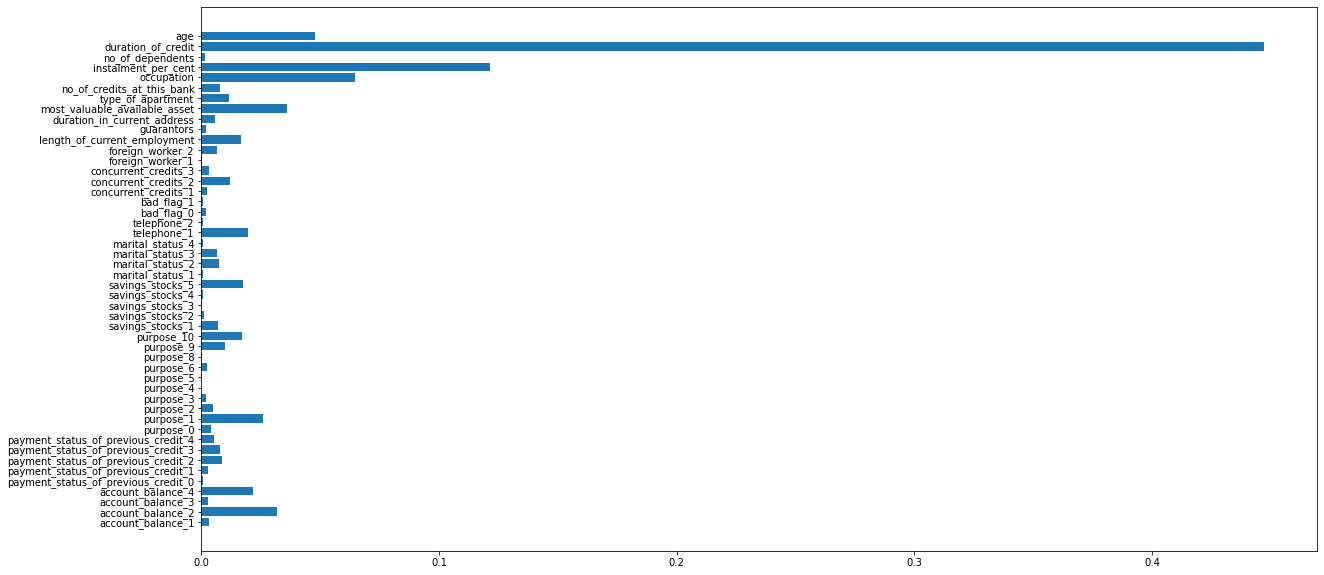

In [56]:
plt.figure(figsize=(20,10))

plt.barh(data_tree.feature_names_in_, data_tree.feature_importances_)


In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_tree =RandomForestRegressor()
rf_tree.fit(train_x,train_y)

RandomForestRegressor()

<BarContainer object of 48 artists>

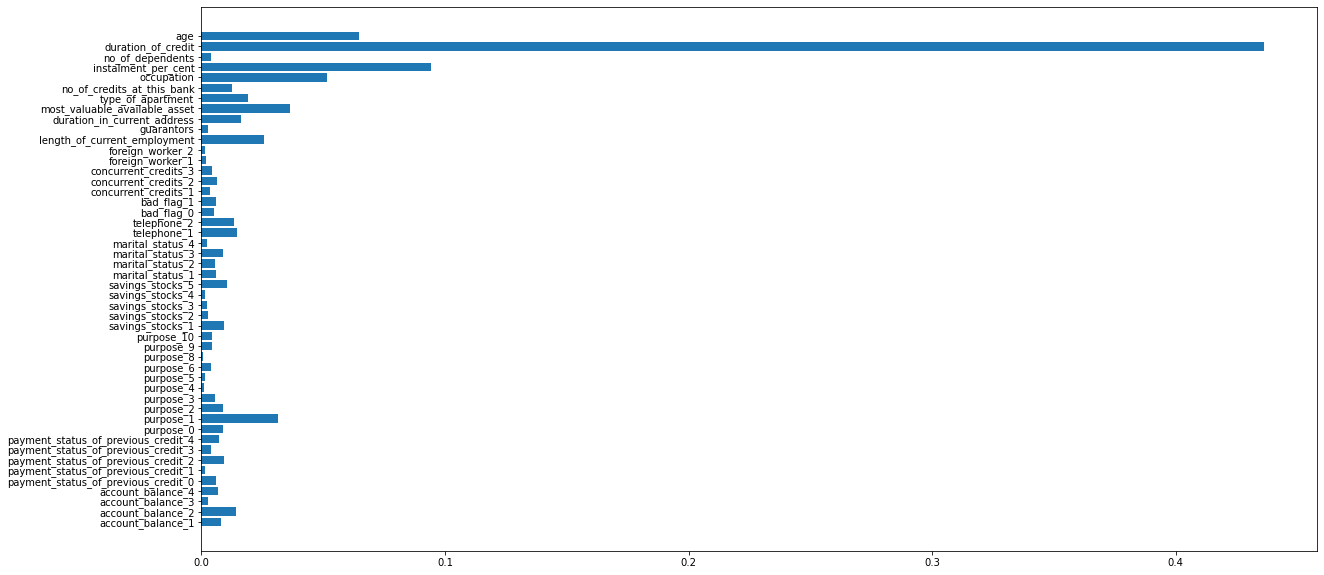

In [58]:
plt.figure(figsize=(20,10))

plt.barh(rf_tree.feature_names_in_,rf_tree.feature_importances_)


In [72]:
dt_tree_features=pd.DataFrame(data=[data_tree.feature_names_in_,data_tree.feature_importances_]).T

In [74]:
dt_tree_features.columns=['Features','values']

In [80]:
dt_tree_fin=dt_tree_features.sort_values(by='values',ascending=False)

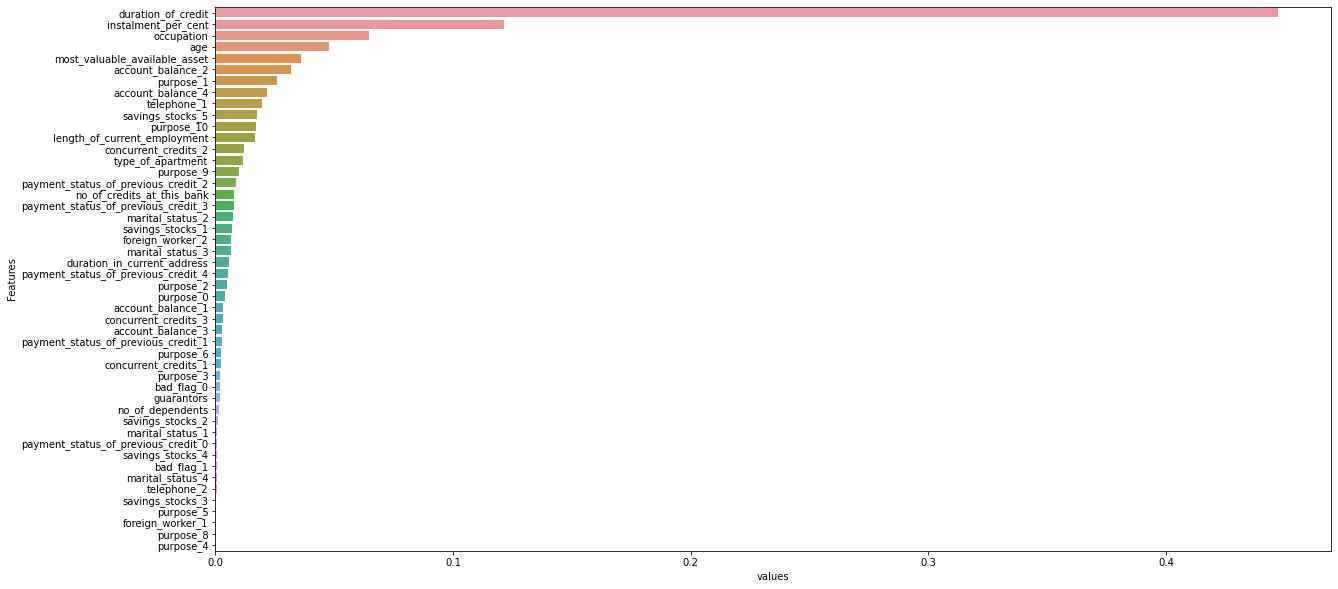

In [86]:
plt.figure(figsize=(20,10))

sns.barplot(x='values',y='Features',data=dt_tree_fin)
plt.show()

In [87]:
?sns.barplot?

In [ ]:
?sns.barplot